In [1]:
%pylab inline
import os
import time 
import scipy as sp
from scipy.integrate import odeint,quad 
from astropy import units as u
import math
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


#### 1. [10 pts] Using the Friedman equation find values of Ωm,, Ωr, ΩΛ that will give rise to a####
#### (a) Loitering universe (use a universe with a positive matter density) ####
#### (b) A big crunch universe ####
#### Plot your results showing the scale factor as a function of time.####

First we need the Friedmann equation for a curved space (Ryden 6.34):


$$\frac{H^2}{H_0^2} = \frac{\Omega_{m,0}}{a^3}+\frac{1-\Omega_{m,0}-\Omega_{\Lambda,0}}{a^2}+\Omega_{\Lambda,0} $$


solving for $dt$:



$$(\frac{da}{dt})^2\frac{1}{H_0^2a^2} = \frac{\Omega_{m,0}}{a^3}+\frac{1-\Omega_{m,0}-\Omega_{\Lambda,0}}{a^2}+\Omega_{\Lambda,0} $$




$$\frac{da}{dt} = H_0a\sqrt{\frac{\Omega_{m,0}}{a^3}+\frac{1-\Omega_{m,0}-\Omega_{\Lambda,0}}{a^2}+\Omega_{\Lambda,0}} $$




$$ dt = \frac{da}{H_0a\sqrt{\frac{\Omega_{m,0}}{a^3}+\frac{1-\Omega_{m,0}-\Omega_{\Lambda,0}}{a^2}+\Omega_{\Lambda,0}}}  $$

In [2]:
h0 = 70.0*(u.km/(u.s*u.Mpc)) #km/s/MPc
H0 = h0.to(1/u.Gyr).value
def dt(a,O):
    Om,Ol = O
    dt = 1.0/(H0*a*sqrt((Om/(a**3.0))+((1.0-Om-Ol)/(a**2))+(Ol)))
    return dt
def da(a,O):
    Om,Ol = O
    da = (H0*a*sqrt((Om/(a**3.0))+((1.0-Om-Ol)/(a**2))+(Ol)))
    return da


In [3]:
#Loitering Universe Parameters (Ryden p.115)
#Om = 0.3
#Ol = 1.7134
t = []
a = linspace(0.1,1,100)
i=0
while i<len(a):
    x = sp.integrate.quad(dt,0.1,a[i],args=([0.3,1.7134]))[0]
    t.append(x)
    i+=1  

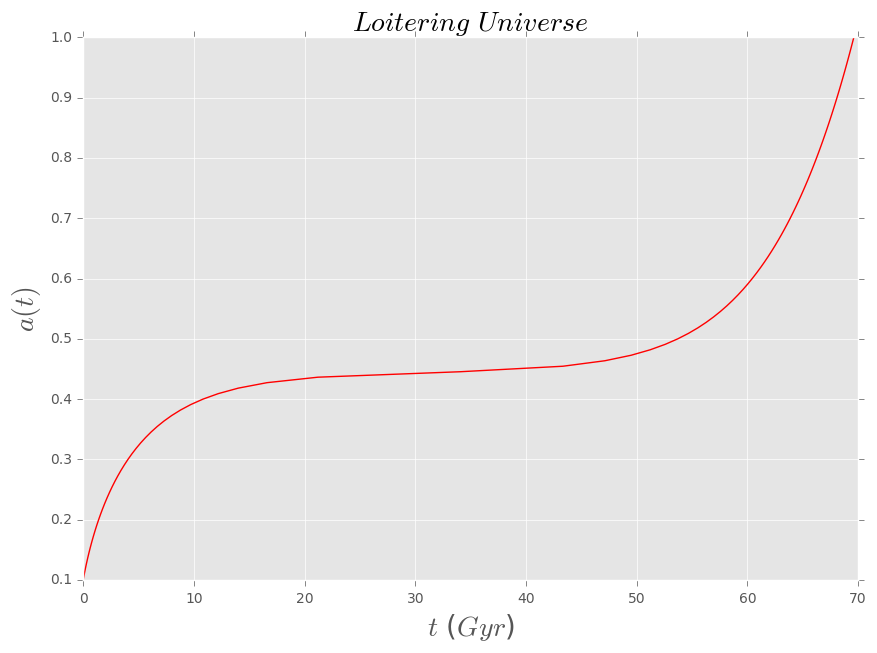

In [4]:
fig,ax = subplots(1,1)
ax.plot(t,a,color='r')
ax.set_xlabel("$t$ ($Gyr$)",fontsize=20)
ax.set_ylabel("$a(t)$",fontsize=20)
ax.set_title("$Loitering$ $Universe$",fontsize=20)
fig.set_size_inches(10,7)

In [5]:
#Big Crunch Universe Parameters (Ryden p.115)
#Om = 0.3
#Ol = -0.3
z = []
a1 = linspace(0.1,3,1000)
j=0
while j<len(a1):
    x = sp.integrate.quad(dt,0.1,a1[j],args=([0.3,-0.3]))[0]
    z.append(x)
    j+=1 
print(argmax(z))

/Users/daltonlacoste/anaconda/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
/Users/daltonlacoste/anaconda/envs/astroconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


641


In [32]:
k=argmax(z)
n=argmax(z)
while (k>0) & (n<1000):
    x = sp.integrate.quad(dt,0.1,a1[k],args=([0.3,-0.3]))[0]
    z[n] = x+2*(z[640]-x)
    n+=1
    k-=1

/Users/daltonlacoste/anaconda/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


In [33]:
y1 = array(z[0:640])
y2 = array(z[641:999])
a2 = linspace(a1[641],0.1,len(y2))
y2[0] = y2[1]


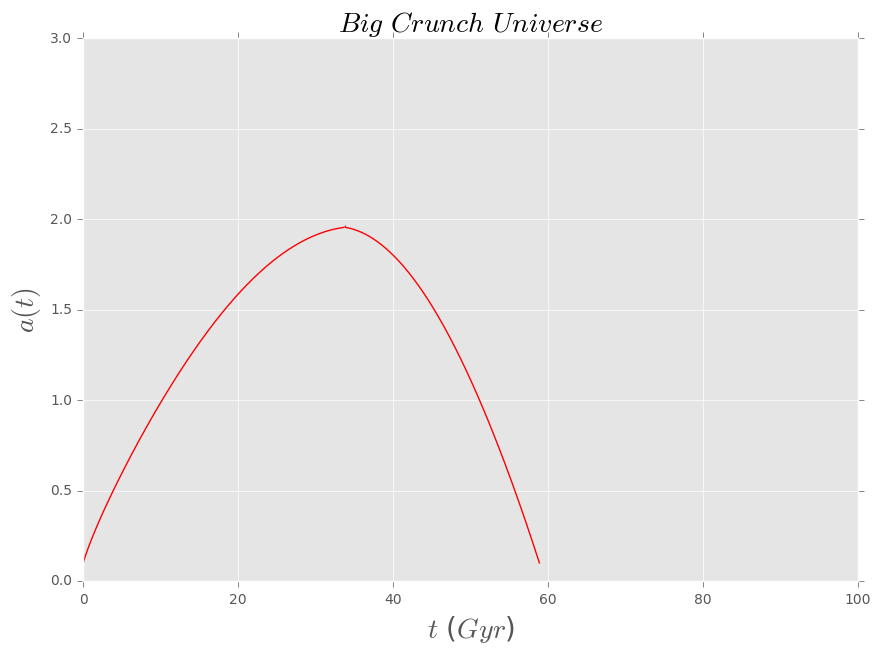

In [41]:
fig1,ax1 = subplots(1,1)
ax1.plot(y2-0.35,a2,color='r')
ax1.plot(y1,a1[0:640],color='r')
ax1.set_xlim(0,100)
ax1.set_ylim(0,3)
ax1.set_xlabel("$t$ ($Gyr$)",fontsize=20)
ax1.set_ylabel("$a(t)$",fontsize=20)
ax1.set_title("$Big$ $Crunch$ $Universe$",fontsize=20)
fig1.set_size_inches(10,7)

#### 2. [10 pts] If a cluster of galaxies has a set of gravitational arcs (e.g. Einstein rings) we can use these arcs to calculate the mass internal to the inscribed circle. If we assume an isothermal sphere show that the velocity dispersion of the cluster is related to the angle of the arc in the image by####
$$ \sigma_v \approx 10^3kms^{-1}(\frac{\theta}{28^{"}}\frac{D_s}{D_{ls}})^{\frac{1}{2}}$$
#### An isothermal sphere has density profile ####
$$\rho = \frac{\sigma_v^2}{2\pi G r^2} $$


The Einstein radius is:

$$\theta_E = (\frac{4GM(<\theta_E)}{c^2}\frac{D_{LS}}{D_S D_L})^{\frac{1}{2}}$$



Thus the mass within the Einstein radius:

$$M(<\theta_E) = \frac{D_SD_L}{D_{LS}}\frac{c^2}{4G}\theta_E^2 $$

M is related to the density by:

$$M_{cluster} = (V_{cluster})(\rho) = (\frac{4}{3}\pi r_{cluster}^3)(\frac{\sigma_v^2}{2\pi Gr_{cluster}^2}) $$

$$M_{cluster} = \frac{2\sigma_v^2r_{cluster}}{3G} $$

$$\frac{2\sigma_v^2r_{cluster}}{3G} = \frac{D_SD_L}{D_{LS}}\frac{c^2}{4G}\theta_E^2$$

$$\sigma_v^2 = \frac{3}{8}\frac{1}{r_{cluster}}\frac{D_SD_L}{D_{LS}}c^2\theta_E^2 $$

Approximation: $r_{cluster}\approx D_L$

$$\sigma_v = \theta_E c (\frac{3D_S}{8D_{LS}})^{\frac{1}{2}} $$

I spent all my time getting the big crunch universe to work, I'm going to have to cut my losses on this one. 